## cifar10 with MLP

In [3]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train: ',x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


Using TensorFlow backend.


x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)
y_train:  (50000, 1)
y_test:  (10000, 1)


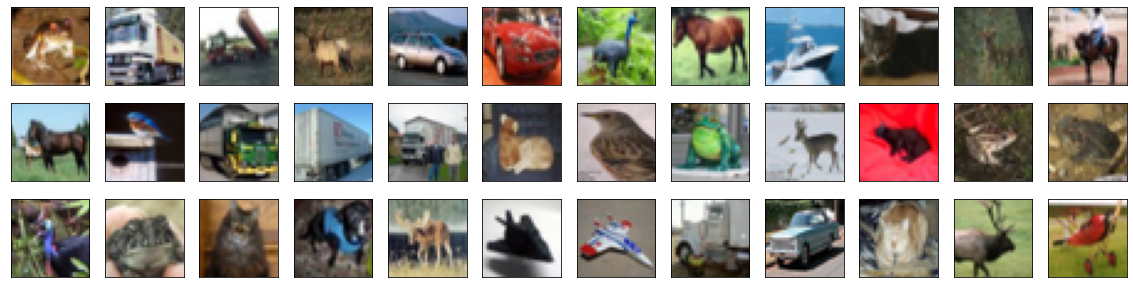

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (20, 5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [6]:
y_train[1]

array([9], dtype=uint8)

In [7]:
from keras.utils import np_utils
num_classes = len(np.unique(y_train))
print(num_classes)
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_valid: ', x_valid.shape)
print('y_valid: ', y_valid.shape)

10
x_train:  (45000, 32, 32, 3)
y_train:  (45000, 10)
x_valid:  (5000, 32, 32, 3)
y_valid:  (5000, 10)


In [8]:
y_valid[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [9]:
x_train.shape[1:]

(32, 32, 3)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 

model=Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
____________________________________________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [12]:
# Train the model
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP.weights.best.hdf5', verbose =1, save_best_only = True)

In [13]:
hist = model.fit(x_train, y_train, batch_size = 32, epochs = 10, 
                validation_data = (x_valid, y_valid), callbacks = [checkpointer],
                verbose = 1, shuffle = True )

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 119s 3ms/step - loss: 2.0380 - accuracy: 0.2760 - val_loss: 1.8292 - val_accuracy: 0.3452

Epoch 00001: val_loss improved from inf to 1.82923, saving model to MLP.weights.best.hdf5
Epoch 2/10
45000/45000 [==============================] - 117s 3ms/step - loss: 1.8467 - accuracy: 0.3318 - val_loss: 1.7625 - val_accuracy: 0.3458

Epoch 00002: val_loss improved from 1.82923 to 1.76246, saving model to MLP.weights.best.hdf5
Epoch 3/10
45000/45000 [==============================] - 116s 3ms/step - loss: 1.8013 - accuracy: 0.3543 - val_loss: 1.8609 - val_accuracy: 0.3280

Epoch 00003: val_loss did not improve from 1.76246
Epoch 4/10
45000/45000 [==============================] - 115s 3ms/step - loss: 1.7789 - accuracy: 0.3616 - val_loss: 1.7575 - val_accuracy: 0.3592

Epoch 00004: val_loss improved from 1.76246 to 1.75750, saving model to MLP.weights.best.hdf5
Epoch 5/10
45000/45000 [==

In [14]:
model.load_weights('MLP.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose =1)
print('accuracy: ',score[1])

10000/10000 [==============================] - 4s 399us/step
accuracy:  0.41679999232292175


In [15]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

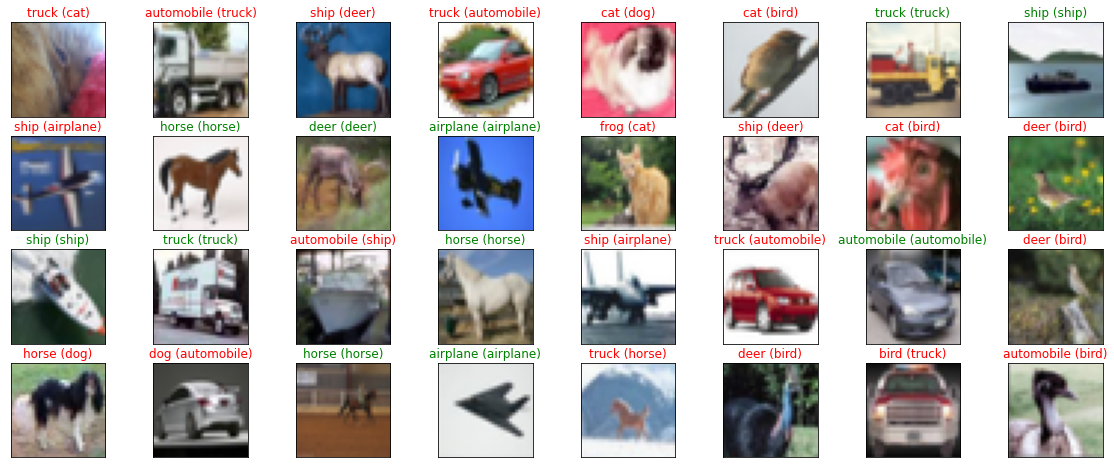

In [16]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## cifar10 with CNN

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size = 2, padding = 'same', strides = 1, activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size = 2, padding = 'same', strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size = 2, padding = 'same', strides = 1, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 64)         

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [24]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 77s - loss: 1.4443 - accuracy: 0.4832 - val_loss: 1.3959 - val_accuracy: 0.5028

Epoch 00001: val_loss improved from inf to 1.39590, saving model to model.weights.best.hdf5
Epoch 2/20
 - 77s - loss: 1.2053 - accuracy: 0.5706 - val_loss: 1.1202 - val_accuracy: 0.5950

Epoch 00002: val_loss improved from 1.39590 to 1.12017, saving model to model.weights.best.hdf5
Epoch 3/20
 - 77s - loss: 1.0990 - accuracy: 0.6115 - val_loss: 1.1421 - val_accuracy: 0.5964

Epoch 00003: val_loss did not improve from 1.12017
Epoch 4/20
 - 77s - loss: 1.0324 - accuracy: 0.6366 - val_loss: 1.1559 - val_accuracy: 0.5996

Epoch 00004: val_loss did not improve from 1.12017
Epoch 5/20
 - 78s - loss: 0.9886 - accuracy: 0.6576 - val_loss: 0.9795 - val_accuracy: 0.6624

Epoch 00005: val_loss improved from 1.12017 to 0.97947, saving model to model.weights.best.hdf5
Epoch 6/20
 - 78s - loss: 0.9622 - accuracy: 0.6666 - val_loss: 0.9834 - val_accuracy: 0.6


 Test accuracy: 0.6995000243186951


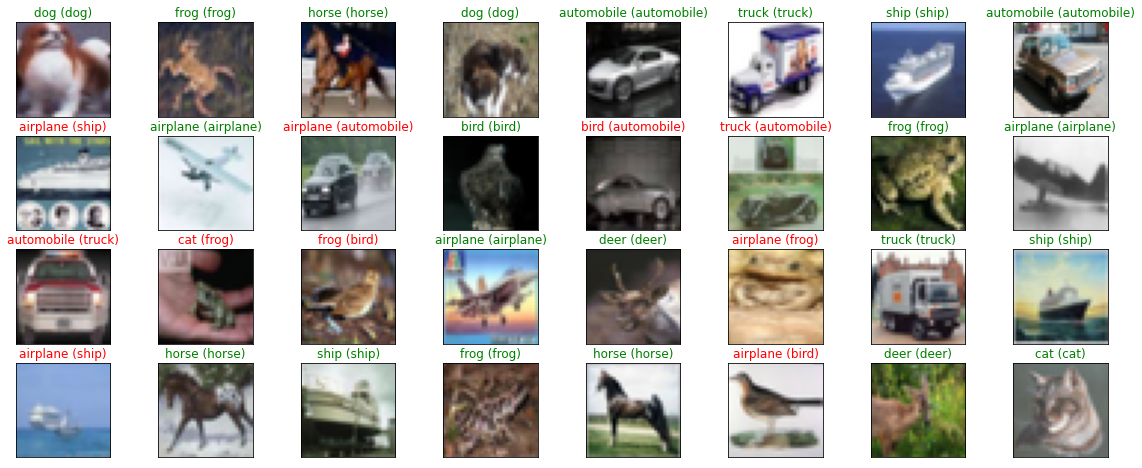

In [25]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## cifar10 with CNN and Image Augmentation

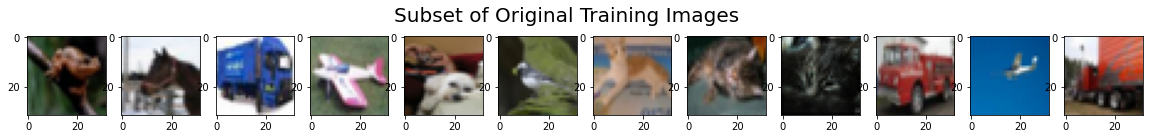

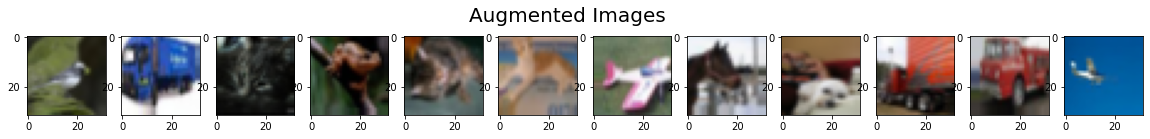

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)



# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)         

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [31]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 25

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/25
 - 110s - loss: 1.6694 - accuracy: 0.3904 - val_loss: 1.3667 - val_accuracy: 0.5238

Epoch 00001: val_loss improved from inf to 1.36674, saving model to aug_model.weights.best.hdf5
Epoch 2/25
 - 111s - loss: 1.4103 - accuracy: 0.4941 - val_loss: 1.2906 - val_accuracy: 0.5500

Epoch 00002: val_loss improved from 1.36674 to 1.29060, saving model to aug_model.weights.best.hdf5
Epoch 3/25
 - 110s - loss: 1.3236 - accuracy: 0.5292 - val_loss: 1.2015 - val_accuracy: 0.5802

Epoch 00003: val_loss improved from 1.29060 to 1.20152, saving model to aug_model.weights.best.hdf5
Epoch 4/25
 - 49s - loss: 1.2659 - accuracy: 0.5512 - val_loss: 1.1681 - val_accuracy: 0.5906

Epoch 00004: val_loss improved from 1.20152 to 1.16807, saving model to aug_model.weights.best.hdf5
Epoch 5/25
 - 49s - loss: 1.2369 - accuracy: 0.5618 - val_loss: 1.0838 - val_accuracy: 0.6120

Epoch 00005: val_loss improved from 1.16807 to 1.08382, saving model to aug_model.weights.best.hdf5
Epoch 6/25
 - 53s - loss: 

In [32]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6478999853134155
